# HW 3 SVMs & Kernel Methods
## Joby George (jg6615)
## Due 3/2/2022




# Problem 1 Prompt:

Suppose $f_{1},\ldots,f_{m}:\mathbb{R}^{d}\to\mathbb{R}$
are convex functions, and 

$$f(x)=\max_{i=1,\ldots,,m}f_{i}(x)$$
Let $k$ be any index for which $f_{k}(x)=f(x)$, and choose $g\in\partial f_{k}(x)$ (a convex function on $\mathbb{R}^{d}$ has
a non-empty subdifferential at all points). 

**Show that $g\in\partial f(x)$.**


# Problem 1 Answer:

We know:

$$g\in\partial f_{k}(x)$$ 

Which means:

$$ f_k(z) \geq f_k(x+z) + g^T_{f_k(x)}(z-x) $$

Since $f_k(x)$ = f(x) we can re-express the $k^{th}$ function, as the function taking the largest value of an input vector x, as f(x). Therefore:

$$ f(z) \geq f(x+z) + g^T_{f_x}(z-x) $$ 

Which proves: 

$$g\in\partial f(x)$$  by definition

### Q.E.D.



# Problem 2: 

Give a subgradient of the hinge loss objective J(w) = max{0, 1 − y$w^T$x}.

From the problem above, we know that the subgradient will exist because the two functions we are comparing to find the maximum are convex, for a given input x.

Therefore:

$$ \partial J(w)=   \left\{
\begin{array}{ll}
      0 & yw^Tx \geq 1 \\
      -yx & yw^Tx < 1 
\end{array} 
\right.  $$

### Q.E.D.

# Problem 3 Revisit this!


Suppose we have function $f:\mathbb{R}^n\rightarrow\mathbb{R}$ which is sub-differentiable everywhere, i.e. $\partial f\neq \emptyset$ for all $x\in\mathbb{R}^n$. 

**Show that $f$ is convex.**


Note, in the general case, a function is convex if for all $x,y$ in the domain of $f$ and for all $\theta \in (0,1)$,
\begin{align*}
    \theta f(a)+(1-\theta)f(b) \geq f(\theta a+(1-\theta)(b))
\end{align*}

### Hint: 

Suppose $f$ is not convex, then by definition, there exists a point in some interval: $x_0\in (a,b)$, such that $f(x_0)$ lies above the line connection $(a,f(a)), (b,f(b))$. Is this possible if the function is sub-differentiable everywhere? 


## Problem 3 Answer: Proof by Contradiction.

Assume $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is sub-differentiable everywhere and is concave in the interval $x_0\in (a,b)$

By properties of convexity, in the interval $x_0\in (a,b)$ the following holds where $\theta$ $\in$ (0,1):
\begin{align*}   
\theta f(a)+(1-\theta)f(b) \geq f(\theta a+(1-\theta)(b))
\end{align*}

If our concave function has strict equality, i.e. 
\begin{align*}   
\theta f(a)+(1-\theta)f(b) = f(\theta a+(1-\theta)(b)) 
\end{align*}

then our function is both concave and convex (linear) and the function is sub-differentiable everywhere, meaning  

\begin{align*}   
\theta f(a)+(1-\theta)f(b) \leq f(\theta a+(1-\theta)(b))
\end{align*}

However, if within the interval $x_0\in (a,b)$  our function does not meet our strict equality constraint then we have:

\begin{align*}
    \theta f(a)+(1-\theta)f(b) < f(\theta a+(1-\theta)(b))
\end{align*}

By definition, this means our function does not have a sub-gradient within the interval $x_0\in (a,b)$, proving by contradiction that any function that is sub-differentiable must be convex throughout the domain of the function

### Q.E.D.

# Problem 4 Prompt

$J_{i}(w)=\frac{\lambda}{2}|w\|^{2}+\max\left\{ 0,1-y_{i}w^{T}x_{i}\right\} $.
The function $J_{i}(w)$ is not differentiable everywhere. Specify where the gradient of $J_{i}(w)$ is not defined. Give an expression for the gradient where it is defined.

## Problem 4 Answer

$\partial$ J(w) is defined and undefined in the following domains

\begin{eqnarray*}
\partial J(w) & = & \begin{cases}
      undefined \space where \space y_iw^Tx_i = 0  \\
      defined \space where \space y_iw^Tx_i \neq 0 
\end{cases}
\end{eqnarray*}



# Problem 5a Prompt

$J_{i}(w)=\frac{\lambda}{2}|w\|^{2}+\max\left\{ 0,1-y_{i}w^{T}x_{i}\right\} $.
The function $J_{i}(w)$ is not differentiable everywhere. Specify where the gradient of $J_{i}(w)$ is not defined. Give an expression for the gradient where it is defined.

## Problem 5 Answer

$\partial$ J(w) is defined and undefined in the following domains

\begin{eqnarray*}
\partial J(w) & = & \begin{cases}
      undefined \space where \space y_iw^Tx_i = 0  \\
      defined \space where \space y_iw^Tx_i \neq 0 
\end{cases}
\end{eqnarray*}




# Problem 6 

In [10]:
import os
import numpy as np
import random
from collections import Counter

def read_data(file):
    '''
    Read each file into a list of strings.
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on',
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)

def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review



def load_and_shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "data/pos"
    neg_path = "data/neg"

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    return review

# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale
        
def create_bag_of_words(input_text):
    """
     Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i) 
    """
    return(Counter(input_text))

# Problem 7



In [11]:
random.seed('27')

review = load_and_shuffle_data()

#https://stackoverflow.com/questions/23078756/python-get-the-last-element-of-each-list-in-a-list-of-lists
X_train = [create_bag_of_words(x[:-1]) for x in review[:1500]]
y_train = [x[-1] for x in review[:1500]]

X_test = [create_bag_of_words(x[:-1]) for x in review[1500:]]
y_test = [x[-1] for x in review[1500:]]
#X_train, y_train = review[:1500][:-1], review[:1500][-1]
#X_test, y_test = review[1500:], review[1500:][-1]

In [12]:
def pegaso_algo(x,y,lambda_reg, max_epoch):
    """
     Runs the Pegaso_Algo to find the hyperplane of weights to minimize regularized risk in sentiment aalysis
        Args:
            X - a list of dictionaries, containing the words in the documents
            y - a vector of sentiment labels for the given training data
            max_epoch -  number of epochs to run our gradient descent on
        Returns:
            W - a dictionary of the weights the result of Pegaso algo
    """ 

    #create blank dictionary, assign epoch as 0, 
    w={}
    epoch = 0
    
    #initialize t 
    t=0
    
    while epoch < max_epoch:
        #pull every dictionary in our list of dictionaries
        for document in range(len(x)):
            t+=1
            step_size = 1/(t*lambda_reg)
            increment(w, -step_size*lambda_reg, w)
            if y[document]*dotProduct(w,x[document])<1:
                increment(w,step_size*y[document],x[document])
        epoch+=1
    return w


In [13]:
def pegaso_algo_fast(x,y,lambda_reg, max_epoch):
    """
     Runs the Pegaso_Algo_fast to find the hyperplane of weights to minimize regularized risk in sentiment aalysis
        Args:
            X - a list of dictionaries, containing the words in the documents
            y - a vector of sentiment labels for the given training data
            max_epoch -  number of epochs to run our gradient descent on
        Returns:
            W - a dictionary of the weights the result of Pegaso algo fast
    """  
    W={}
    s=1
    epoch = 0
    t=1
    while epoch < max_epoch:
        for document in range(len(x)):
            t+=1
            step_size = 1/(lambda_reg*t)
            #st+1 = s-stepsize*lambda*s
            s += -step_size*lambda_reg*s
            #alternatively
            #s= (1-step_size*lambda_reg)*s
            
            if y[document]*dotProduct(W,x[document])*s<1:
                increment(W,(1/s)*step_size*y[document],x[document])
        epoch+=1
    W.update((x,s*y) for x,y in W.items())
    return W

In [14]:
pred = dotProduct(w_,X_train[0])



NameError: name 'w_' is not defined

In [ ]:

y_train

In [ ]:
pred

In [ ]:
import time
start_time_1=time.time()
w_=pegaso_algo(X_train,y_train,lambda_reg=0.1,max_epoch=6)
end_time_1=time.time()
print(end_time_1-start_time_1)
start_time=time.time()
w_fast=pegaso_algo_fast(X_train,y_train,lambda_reg=0.1,max_epoch=6)
end_time=time.time()
print(end_time-start_time)


In [ ]:
w_fast=pegaso_algo_fast(X_train,y_train,lambda_reg=0.1,max_epoch=6)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [ ]:
#https://stackoverflow.com/questions/17671875/how-to-subtract-values-from-dictionaries
#https://stackoverflow.com/questions/43749630/get-a-count-of-dictionary-keys-with-values-greater-than-some-integer-in-python
validate  = {key: w_fast[key] - w_.get(key, 0) for key in w_} 
wordlist = [word for word, diff in validate.items() if diff >= 10e-5]
len(wordlist)
#no words with a difference in weights between 10e-5

# Problem 11

Classification Error

In [101]:
import pandas as pd
def classification_error(w, x, y):
    """
    Computes the classification error between our predctied sentiment analysis
    and true labels using 0-1 loss of the linear predictor w^Tx
    Args:
        w - a sparse weight vector
        x - aa sparse vector containing frequency count of words
        y - true labels 
    Returns:
        the percentage of classification's that were incorreclty labelled
    """
    temp = [dotProduct(w, p)  for p in x] 
    pred = [1 if prediction >= 0 else -1 for prediction in temp]
    test_error = abs(np.array(pred) - np.array(y))
    
    return(sum(test_error)/2/len(y))
    

In [102]:
error = classification_error(w_fast, X_test, y_test)
print(error)

NameError: name 'w_fast' is not defined

# Problem 12:

Grid Search lambda vals and number of epohcs

In [103]:
def grid_search_pegaso_test_error(lambda_vectors):
    test_error_list = []
    for lam in lambda_vectors:
        w_fast = pegaso_algo_fast(X_train,y_train, lam, max_epoch = 50)
        message = 'test classificaiton error of lambda = {} was '.format(lam)
        error = classification_error(w_fast,X_test,y_test) 
        test_error_list.append(error)
       #print(message + str(error))
    return(test_error_list)

In [ ]:
lambda_list_1 = [10**-i for i in range(0,10)]
lambda_list_2 = np.linspace(.01,.5, 10)

In [ ]:
test_error_list_1 = grid_search_pegaso_test_error(lambda_list_1)

# Problem 13 

Looking at the score and seeing whether score is correlated with classification error 

In [15]:
w_optimal = pegaso_algo_fast(X_train,y_train,lambda_reg=0.1,max_epoch=50)
bins = np.linspace(-5,5,10)
pred =  [dotProduct(w_optimal, p)  for p in X_test] 
was_pred_correct = [1 if np.sign(pred[i]) == np.sign(y_test[i]) else -1 for i in range(len(y_test))]
dfs = pd.DataFrame([pred, was_pred_correct]).T
dfs['bins'] = pd.cut(dfs[0], bins=bins)




NameError: name 'pd' is not defined

In [ ]:
dfs.groupby(by='bins')[1].mean()

In [ ]:
dfs

In [ ]:
feature_importance = {}
for key in X_test[495].keys():
    try:
        feature_importance[key] = w_optimal[key]*X_test[495][key], 
        
    except:
        feature_importance[key] = 0

In [ ]:
sorted_feat_importance = {k:v for  k, v in sorted(feature_importance.items(), key=lambda item: abs(item[1]),reverse=True)}

In [ ]:
sorted_feat_importance

In [ ]:
sorted_feat_importance

In [ ]:
dfs.groupby(by='bins')[1].mean()

In [ ]:
error = classification_error(w_fast, X_train, y_train)
test_error = abs(np.array(error) - np.array(y_train))

In [28]:
### Kernel function generators
import functools
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i x2_j^T in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    M = scipy.spatial.distance.cdist(X1,X2, metric='sqeuclidean')
    return(np.exp(-M/(2*sigma**2)))
    #TODO

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
        degree
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    return(offset + linear_kernel(X1,X2)**degree)
    #TODO
k = functools.partial(polynomial_kernel, offset = 1, polynomial = 3)

In [82]:
x0 = np.array([[-4],[-1],[0],[2]])


kernel_matrix = linear_kernel(x0,x0)


y0 = np.array([[2],[0],[3],[5]])
kernel_matrix




array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

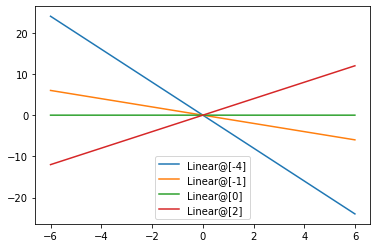

In [80]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

In [ ]:
sum(xpts@np.array(-4).reshape(1,1))

In [ ]:
xpts.shape

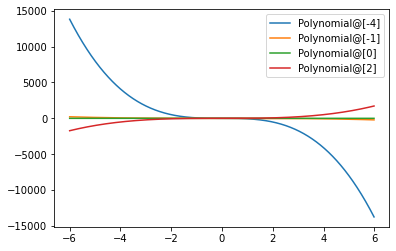

In [29]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
for i in range(len(prototypes)):
    y = polynomial_kernel(prototypes, xpts, 1,3 ) 


    label = "Polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

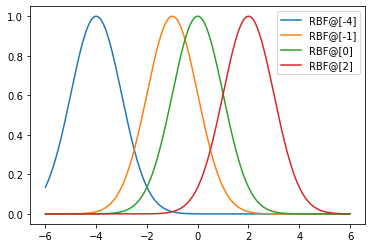

In [48]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
for i in range(len(prototypes)):
    y = RBF_kernel(prototypes, xpts, 1) 


    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

In [34]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        kernel_mat = self.kernel(X, self.training_points)
        return(kernel_mat@self.weights)
        

In [77]:
prototype_points = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)
x = np.array([-4,-1,0,2]).reshape(-1,1)

k = functools.partial(RBF_kernel, sigma = 1)


kernel_mach = Kernel_Machine(k, prototype_points, weights)
kernel_mach.predict(x)


array([[0.01077726],
       [0.52880462],
       [0.21306132],
       [0.48230437]])

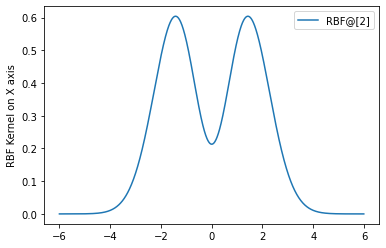

In [78]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)

# RBF kernel, trained applying our prototype points and weights to the
#x axis values
y = kernel_mach.predict(xpts)
plt.plot(xpts, y, label=label)
plt.legend(loc = 'best')
plt.ylabel('RBF Kernel on X axis')
plt.show() 
 

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [112]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

In [108]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    
    kernel_matrix = kernel(X,X)
    matrix = ((np.identity(X.shape[0])*l2reg)+kernel_matrix)
    alpha = np.linalg.inv(matrix)@y
    
    return Kernel_Machine(kernel, X, alpha)

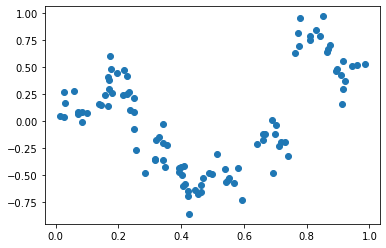

In [109]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.scatter(x_train,y_train)


# Problem 27

Use the code provided to plot your fits to the training data for the RBF kernel with a fixed regularization parameter of 0.0001 for 3 different values of sigma: 0.01, 0.1, and 1.0. What values of sigma do you think would be more likely to over fit, and which less?

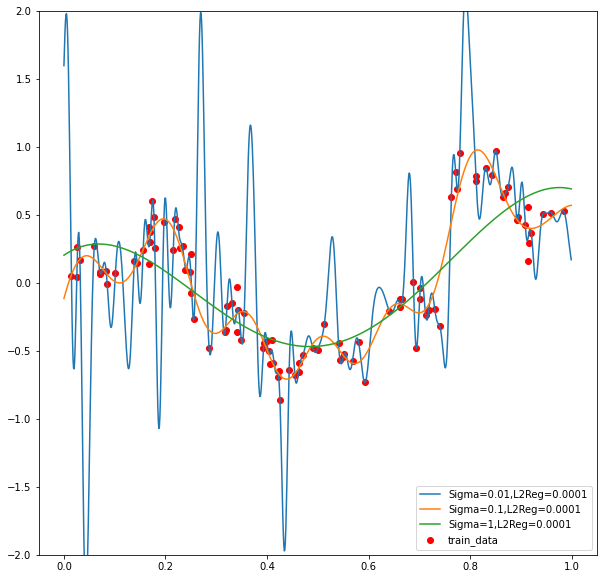

In [115]:
l2reg = 0.0001

plt.figure(figsize=(8,8))


for sigma in [.01,.1,1]:
    
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)

plt.scatter(x_train,y_train, label='train_data', color='red')    
plt.plot()
plt.legend(loc = 'best')
plt.ylim(-2,2)
plt.show()

## Problem 27 commentary

With a lower value of $\sigma$, we observe a more chaotic and noisy, which would correspond to **overfitting**, higher $\sigma$, on the other hand is too smooth for our data and **underfit** the true underlying distribution

# Problem 28

Use the code provided to plot your fits to the training data for the RBF kernel with a fixed sigma of 0.02 and 4 different values of the regularization parameter λ: 0.0001, 0.01, 0.1, and 2.0. What happens to the prediction function as λ → ∞?

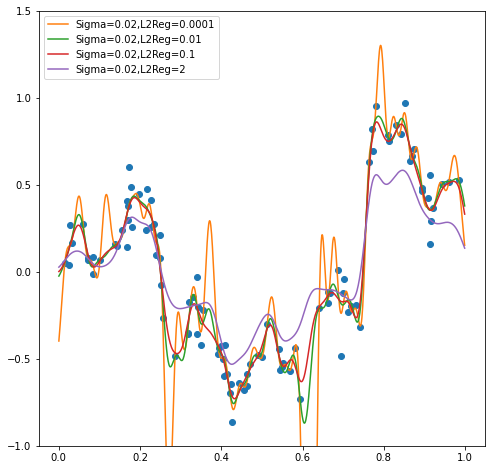

In [120]:
plt.figure(figsize=(8,8))
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

## Problem 28 commentary

When we increase lambda, we see that our predictive function becomes more linear in nature, untill our penalizer becomes so large that we set our weights to zero and end up with the constant function y =0

In [122]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [123]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [ ]:
sigma_list,l2reg_list = [10**i for i in range(0,3)], [10**i for i in range(0,3)]
offset_list = range(-5,5)
degree_list = range(2,0,2)
param_grid = [{'kernel': ['RBF'],'sigma':sigma_list, 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':offset_list, 'degree':degree_list,'l2reg':l2reg_list },
              {'kernel':['linear'],'l2reg':l2reg_list }]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

In [ ]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"], ascending=False)

In [ ]:
# Can be a more convenient way to look at the table
#import qgrid 
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
#qgrid.show_grid(df_toshow)

In [ ]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 1
degree = 1
l2reg = 1
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 1
l2reg= 1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

# Kernel SVM optional problem

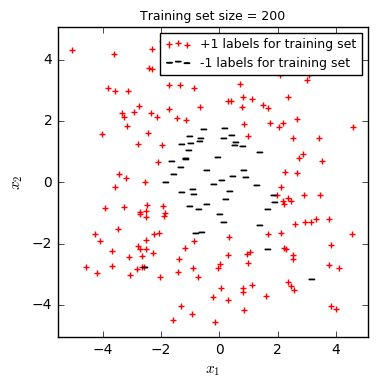

In [8]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [ ]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()